<a href="https://colab.research.google.com/github/AdariPraveen/AdariPraveen/blob/main/AdvertisingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/AdariPraveen/AdariPraveen.git

fatal: destination path 'AdariPraveen' already exists and is not an empty directory.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,pair_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('AdariPraveen/sample_data.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
mean_squared_error(y_test,y_pred)
r2_score(y_test,y_pred)

-3.7844575943797016

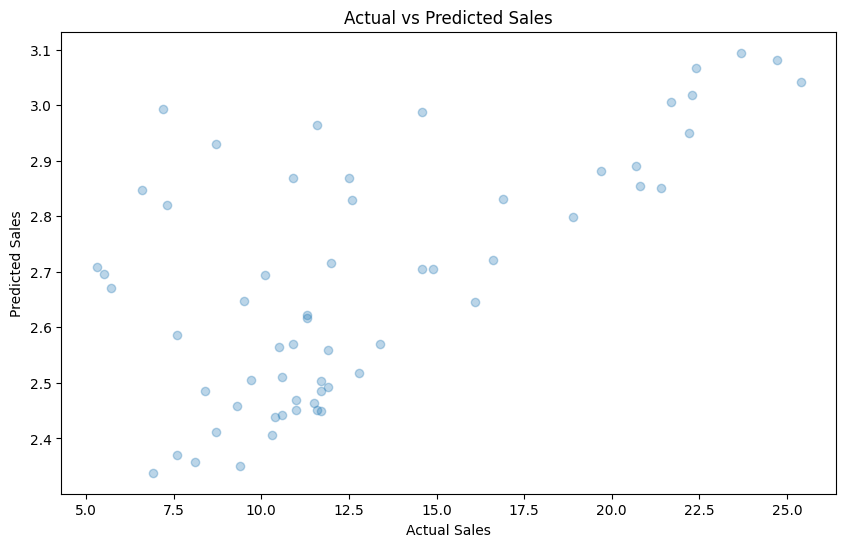

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.3)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

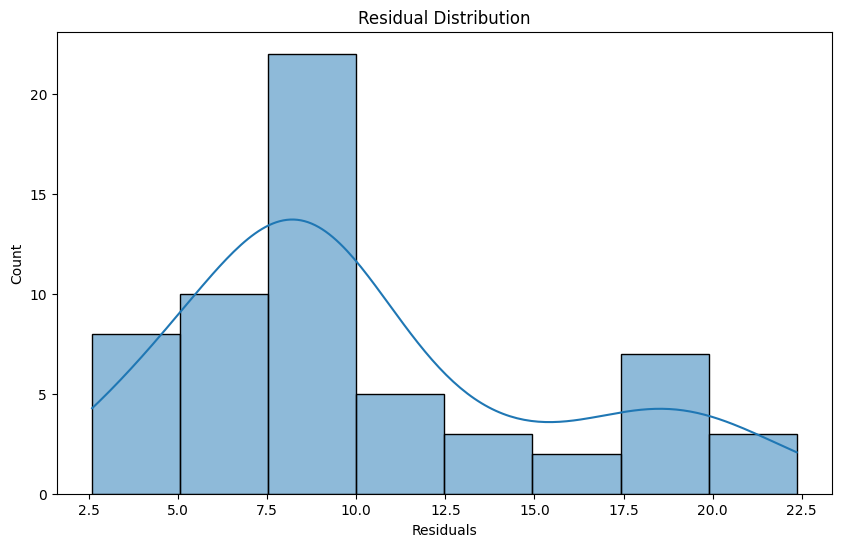

In [18]:
residuals=y_test-y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True)
plt.xlabel('Residuals')
plt.title('Residual Distribution')
plt.show()